In [2]:
#import of libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("house_price_regression_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [6]:
#checking the missing value
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [7]:
#check the shape of the data
df.shape

(1000, 8)

<Axes: >

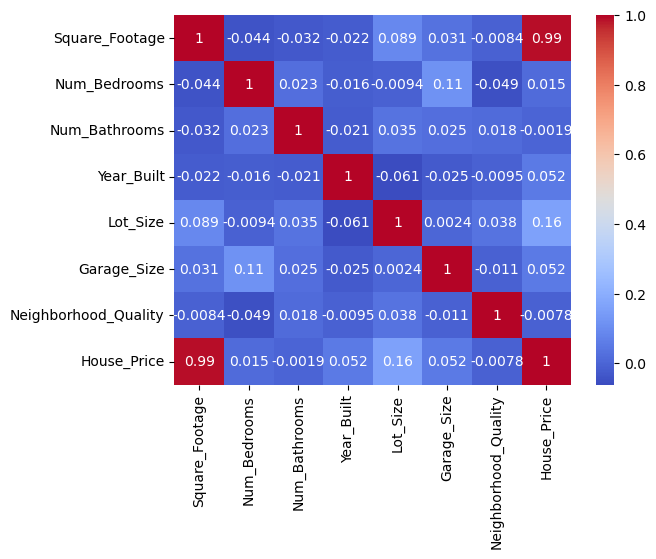

In [8]:
#Explore the correlation between variable
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

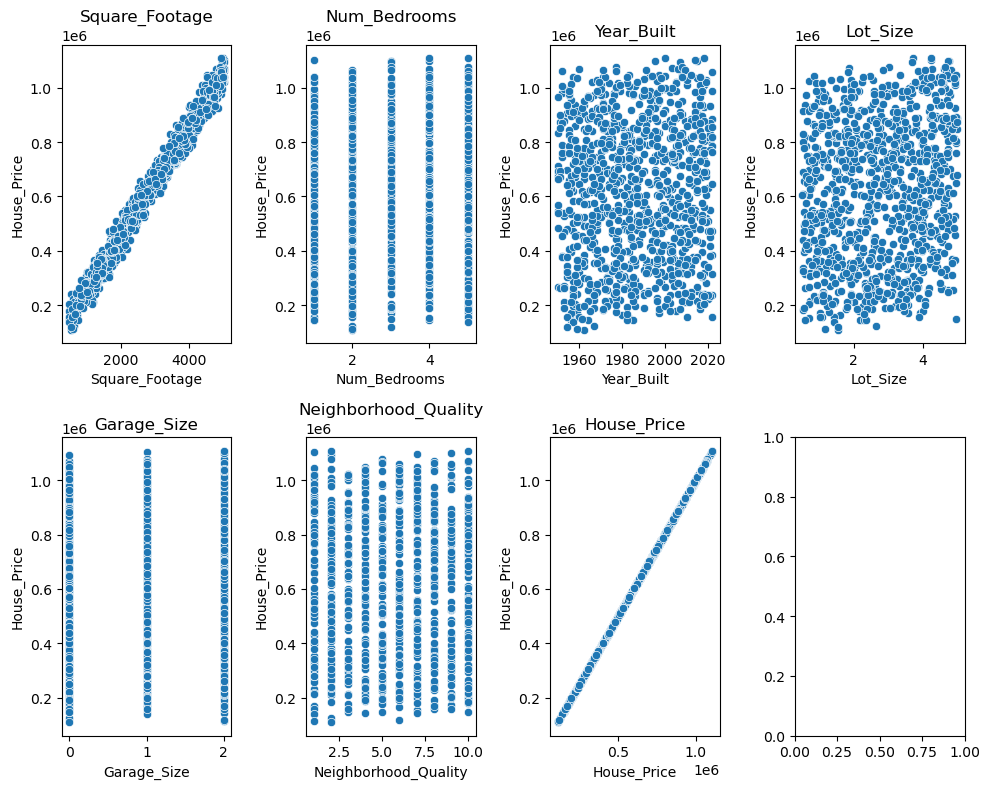

In [10]:
#Visualize between independent and dependent variable
features = ['Square_Footage', 'Num_Bedrooms', 'Year_Built','Lot_Size','Garage_Size','Neighborhood_Quality','House_Price'] 
# Get the number of features
num_features = len(features)

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))

# Loop through features (avoiding unnecessary calculations)
for feature_idx in range(num_features):
    i = feature_idx // 4  # Calculate row index efficiently
    j = feature_idx % 4  # Calculate column index efficiently

    # Skip if exceeding features list length
    if feature_idx >= num_features:
        continue

    sns.scatterplot(x=features[feature_idx], y='House_Price', data=df, ax=axs[i, j])
    axs[i, j].set_title(features[feature_idx])

plt.tight_layout()
plt.show()

In [11]:
#Data  preprocessing 
X = df[['Square_Footage','Lot_Size','Year_Built','Num_Bedrooms']]
Y = df['House_Price']

In [13]:
#Split the data into training and testing and testing 
X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)


In [14]:
#Building linear regression model
model = LinearRegression()

In [15]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
for prediction in y_pred:
    print(prediction)

876324.1490522185
498331.052488334
935815.1920438018
1041659.0027226973
788479.0633313125
736501.6033862592
987080.6260928996
881094.9539849972
808969.1117108646
934024.522750224
758300.3396760277
658201.0178084169
220459.50786615396
1033767.0514318361
538316.6224381481
193022.90809490392
462041.44109089207
365038.50205088686
752326.9854900502
363655.43716219533
782142.2021778994
492963.9473509565
683638.8268565624
875456.2108086925
444663.37813891564
389328.62330303853
469790.4814221738
438454.44132025726
184684.0470685251
478562.4730205508
267215.47232072987
887757.8781298148
769915.9797121249
366518.13236058876
488088.3577955249
770554.7666852004
470093.9449876123
571686.6263386733
307752.0580410785
168938.52864898974
296141.3083062186
295323.8282656716
514783.0836845408
323416.2060811883
1087394.0165748615
1012684.0657858616
765844.7829663176
801138.7295562318
1017033.0852175402
682802.7992828591
292613.02587172063
756299.0238648453
803660.3086078363
727481.2864535777
535710.072550

In [18]:
#produce a dataframe of the prediction and actual data
df_results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df_results)

           Actual     Predicted
521  9.010005e+05  8.763241e+05
737  4.945375e+05  4.983311e+05
740  9.494042e+05  9.358152e+05
660  1.040389e+06  1.041659e+06
411  7.940100e+05  7.884791e+05
..            ...           ...
408  8.245296e+05  8.059278e+05
332  1.803936e+05  1.585880e+05
208  9.658167e+05  9.806524e+05
613  4.336642e+05  4.423625e+05
78   6.639050e+05  6.660305e+05

[200 rows x 2 columns]


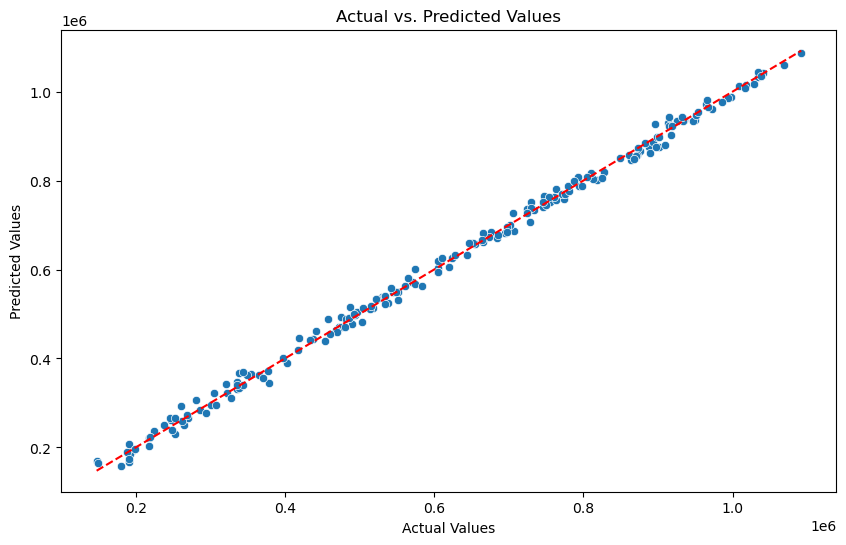

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_results' with 'Actual' and 'Predicted' columns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_results)

# Add a diagonal line representing perfect predictions
plt.plot([df_results['Actual'].min(), df_results['Actual'].max()], 
         [df_results['Actual'].min(), df_results['Actual'].max()], 
         color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show() 

In [91]:
#Evaluation of the model 
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')

#using precision score 
score = model.score(X_test,y_test)
print('Model score:', score)

Mean Squared Error: 168707341.5884063
Model score: 0.9973827127998444


In [103]:
#plot the regression line
"""
plt.scatter(X_test[:, 0], y_test, color='gray')  # Use first column of X_test
plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2)  # Use first column of X_test
plt.xlabel('Square_Footage')
plt.ylabel('Dependent Variable')
plt.show()"""


"\nplt.scatter(X_test[:, 0], y_test, color='gray')  # Use first column of X_test\nplt.plot(X_test[:, 0], y_pred, color='red', linewidth=2)  # Use first column of X_test\nplt.xlabel('Square_Footage')\nplt.ylabel('Dependent Variable')\nplt.show()"